In [46]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import scale
import matplotlib as plt
%matplotlib inline

### Boilerplate

In [47]:
def plot_decision_boundary(formula, x_range):  
    x = np.array(x_range)  
    y = eval(formula)
    plt.pyplot.scatter(x = data[:,0], y = data[:,1], c = data[:,-1], cmap=plt.colors.ListedColormap(colors))
    plt.pyplot.plot(x, y)  
    plt.pyplot.show()

In [80]:
def initialize_and_run(data, func):
    weights = np.random.normal(0,1,[1,3])
    n = 0.01
    errors = []
    for i in range(5):
        errors.append(calculate_errors(weights,data))
        line = '{}*x-{}'.format(-weights[0][0]/weights[0][1],weights[0][2]/weights[0][1])
        plot_decision_boundary(line, range(-20, 20))
        weights = update_weights(data,weights,n,func)
    plot_learning_rate(errors)

In [49]:
def update_weights(data,weights,n, func):
    delta_ = func(data,weights,n)
    new_weights = weights + delta_
    return new_weights

In [50]:
def predict(weights, data):
    prediction = np.dot(weights,np.transpose(data[:,:-1]))
    prediction[prediction>0] = 1
    prediction[prediction<=0] = -1
    return prediction

In [51]:
def calculate_errors(weights, data):
    matrix = (predict(weights,data)*data[:,-1])
    x,y = np.unique(matrix, return_counts=True)
    return np.count_nonzero(matrix == -1)

In [67]:
def plot_learning_rate(errors):
    plt.pyplot.plot(errors) 

### Generate Data

In [53]:
mean1 = [0,-5]
mean2 = [0,5]
cov = [3,0],[0,3]
size = [100]

In [54]:
data1 = np.random.multivariate_normal(mean1, cov, size)
data2 = np.random.multivariate_normal(mean2, cov, size)
labels1 = np.ones((100,1))
labels2 = np.ones((100,1))*-1
data1 = np.hstack((data1, np.ones((100,1)), labels1))
data2 = np.hstack((data2, np.ones((100,1)),labels2))
data = np.vstack((data1,data2))
data = shuffle(data)

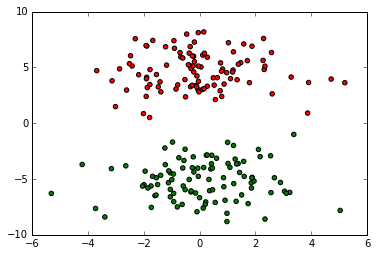

In [55]:
colors = ['red','green']
plt.pyplot.scatter(x = data[:,0], y = data[:,1], c = data[:,-1], cmap=plt.colors.ListedColormap(colors))

### Initiate Weights, tuning paramets etc...

### Delta rule

In [95]:
def delta(data, weights, n):
    inner_matrix = (np.dot(weights,np.transpose(data[:,:-1]))-data[:,-1])
    return -n*np.dot(inner_matrix,data[:,:-1])

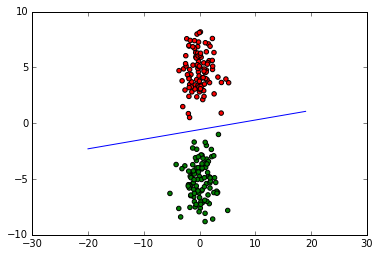

[[   2.00275177 -107.59742824   -0.29121015]]


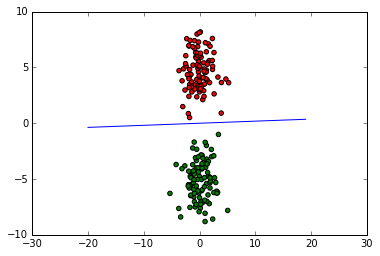

[[  -74.29186943  5678.42555068   -44.2738029 ]]


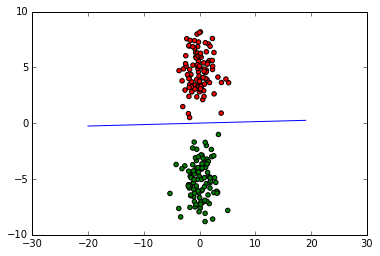

[[   3778.96022568 -300210.23541513    2394.63184055]]


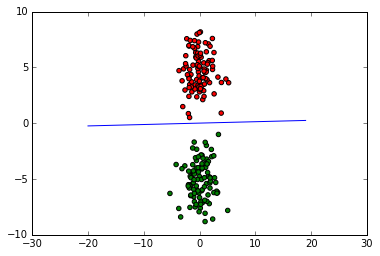

[[  -199056.32158842  15871090.53857544   -126647.36357752]]


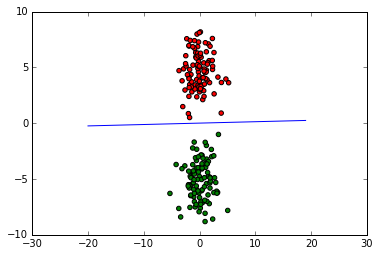

[[  1.05199038e+07  -8.39050503e+08   6.69542950e+06]]


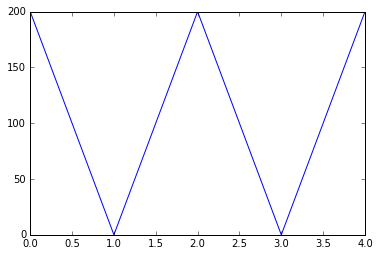

In [96]:
initialize_and_run(data,delta)

### Perceptron learning

In [70]:
def perceptron(data, weights, n):
    prediction = predict(weights,data)
    perceptron_matrix = prediction-data[:,-1]
    return np.dot(perceptron_matrix,data[:,:-1])*-n

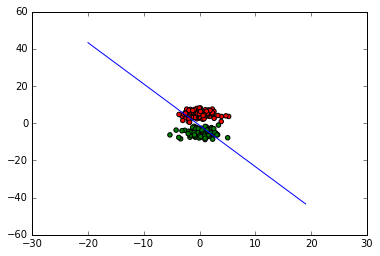

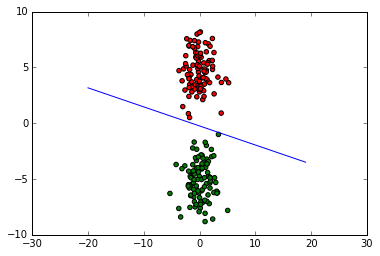

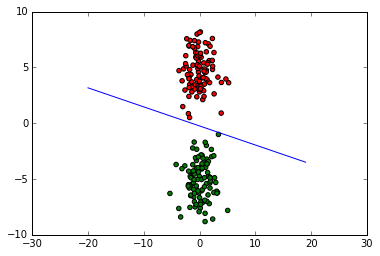

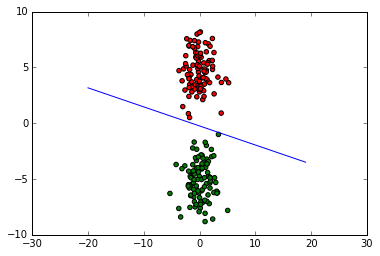

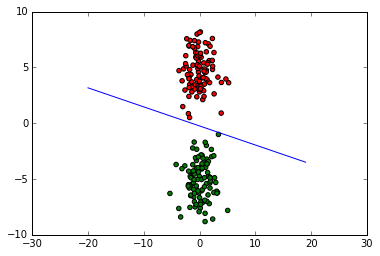

[28, 0, 0, 0, 0]


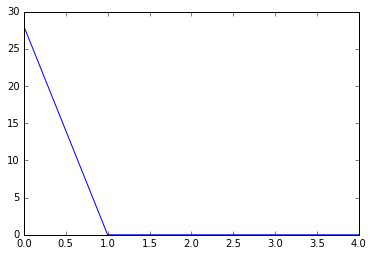

In [71]:
initialize_and_run(data, perceptron)

### Feed forward

In [215]:
transfer_function = np.vectorize(lambda x: 2/(1+np.exp(-x))-1)

def transfer_derivative(x):
    f =transfer_function(x)
    return (1+f)*(1-f)/2

In [328]:
#TODO initialize 3x5 matrix of weight_mate1 and a 5x1 matrix of weigh_mate2
layer_one = np.random.normal(0,1,[3,nodecount])
layer_two = np.random.normal(0,1,[nodecount+1,1])

def forward_pass(data, nodecount, layer_one, layer_two):
    inner_matrix = transfer_function(np.dot(data[:,:-1],layer_one))
    inner_matrix = np.c_[inner_matrix, np.ones(len(inner_matrix))]
    return np.dot(inner_matrix,layer_two), inner_matrix

def backwards_pass(data, nodecount, output, inner_matrix,layer_one, layer_two):
    delta_output = np.multiply(np.add(transfer_function(output),-np.transpose([data[:,-1]])),transfer_derivative(output))
    delta_hidden = np.multiply(np.transpose(np.dot(layer_two,np.transpose(delta_output))),transfer_derivative(inner_matrix))
    return delta_output, delta_hidden
    

In [329]:
output, inner_matrix = forward_pass(data, nodecount, layer_one, layer_two)

In [330]:
delta_output, delta_hidden = backwards_pass(data, nodecount, output, inner_matrix,layer_one, layer_two)

In [340]:
deltaweight1 = -n*np.dot(np.transpose(data[:,:-1]),delta_hidden)[:,:-1]
deltaweight2 = -n*np.dot(np.transpose(inner_matrix),delta_output)[:-1,:]

In [341]:
np.shape(deltaweight1)

(3, 5)

In [342]:
np.shape(deltaweight2)

(5, 1)

In [373]:
nodecount = 5
n = 0.001
layer_one = np.random.normal(0,1,[3,nodecount])
layer_two = np.random.normal(0,1,[nodecount+1,1])
errors = []
for i in range(15):
    output, inner_matrix = forward_pass(data, nodecount, layer_one, layer_two)
    delta_output, delta_hidden = backwards_pass(data, nodecount, output, inner_matrix,layer_one, layer_two)
    deltaweight1 = -n*np.dot(np.transpose(data[:,:-1]),delta_hidden)[:,:-1]
    deltaweight2 = -n*np.dot(np.transpose(inner_matrix),delta_output)
    layer_one = layer_one + deltaweight1
    layer_two = layer_two + deltaweight2
    errors.append(calculate_errors2(output, data))    
    

[[ -1.30102417e-01]
 [ -1.51337681e-01]
 [  5.39292601e-01]
 [ -4.75717827e-01]
 [ -1.51300079e+00]
 [ -1.92162830e-01]
 [ -1.51967257e+00]
 [  1.32469935e-01]
 [ -2.16196022e-01]
 [ -6.11284748e-01]
 [  1.27852589e+00]
 [  1.01253242e+00]
 [  1.68880553e-01]
 [  9.79218806e-01]
 [ -4.11474493e-01]
 [  9.46173355e-01]
 [  6.00673902e-01]
 [  3.10786687e-01]
 [ -1.68114682e+00]
 [ -7.57213890e-01]
 [  5.98560346e-01]
 [ -5.86223832e-01]
 [  2.88833650e-01]
 [ -1.27275862e+00]
 [  2.47364949e-01]
 [ -2.44700408e-01]
 [ -5.00733602e-01]
 [  2.42712160e-01]
 [ -1.19075675e+00]
 [  8.51230574e-01]
 [  1.60279975e+00]
 [ -6.25276444e-01]
 [ -1.38613084e+00]
 [ -6.75547818e-01]
 [ -5.19780843e-01]
 [ -6.55557840e-01]
 [  1.43987875e+00]
 [ -7.14944282e-01]
 [ -1.80209673e+00]
 [ -4.09238586e-01]
 [ -1.01574641e+00]
 [  1.12596160e+00]
 [  8.95841926e-01]
 [ -7.53482971e-01]
 [ -4.93050346e-01]
 [ -7.90426089e-01]
 [  7.30157933e-01]
 [  5.25284383e-01]
 [  1.13721838e+00]
 [  1.42476728e+00]


[[ 1.85345127]
 [-2.4712751 ]
 [ 2.07295672]
 [ 1.82163678]
 [-2.45199727]
 [ 1.77071468]
 [-1.88674164]
 [ 1.99740414]
 [-2.40614967]
 [-2.5167953 ]
 [-1.19908906]
 [ 2.13001353]
 [ 1.93119703]
 [-2.39832892]
 [ 1.89261277]
 [ 2.09330713]
 [-2.36068059]
 [-2.42055442]
 [-2.54513174]
 [-2.49625805]
 [-2.4096984 ]
 [-2.52847013]
 [ 1.96067967]
 [-2.58155904]
 [ 1.98412846]
 [ 1.99663945]
 [-2.52411016]
 [ 2.0176107 ]
 [-2.58892924]
 [ 1.9269994 ]
 [-0.79179279]
 [ 1.7922425 ]
 [-2.57613272]
 [ 1.8394849 ]
 [ 1.87963244]
 [ 1.20053487]
 [ 2.23319108]
 [-2.52180628]
 [-2.58472891]
 [-2.51318885]
 [-2.57219518]
 [-2.08040553]
 [-2.23015438]
 [-2.544886  ]
 [-2.19933684]
 [-2.53997322]
 [-2.3569207 ]
 [-2.08307763]
 [ 2.18552666]
 [ 2.23180453]
 [ 1.56745711]
 [ 1.34163796]
 [ 2.22598549]
 [ 2.16916852]
 [ 1.43468551]
 [ 2.21534035]
 [-2.48423827]
 [ 2.0293507 ]
 [-1.39283642]
 [ 2.22860914]
 [ 1.94207883]
 [-2.36918929]
 [ 1.37158787]
 [-2.53156127]
 [ 2.23893984]
 [-2.42637895]
 [-2.53344

In [374]:
errors

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [372]:
def calculate_errors2(prediction, data):
    print(prediction)
    matrix = (prediction*data[:,-1])
    x,y = np.unique(matrix, return_counts=True)
    return np.count_nonzero(matrix == -1)